# Malaria Cases and Testing Analysis for 2021

### 1. Loading the Data and Initial Inspection

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the data
df = pd.read_excel('Malaria Cases and Testing 2021.xlsx', sheet_name='Malaria Cases and Testing 2021')

# Display the first few rows of the data
df.head()


,year,OrgunitID,DataID,County,SubCounty,Ward,OrgUnitName,Data,jan,feb,...,aug,sep,oct,nov,dec,MaxZScore,MaxModifiedZScore,GapWeight,OutlierWeight,TotalWeight
0,2021,sEGi1wY7bRB,OoakJhWiyZp,Wajir County,Wajir South Sub County,Habasswein Ward,Abakore Sub District Hospital,Confirmed Malaria (only Positive cases),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,275,0,275
1,2021,M4hBq6jXYVg,OoakJhWiyZp,Wajir County,Wajir North Sub County,Bute Ward,Adadijolle Dispensary,Confirmed Malaria (only Positive cases),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,22,0,22
2,2021,Ya8HkTriZCR,OoakJhWiyZp,Wajir County,Wajir West Sub County,Ademasajide Ward,Ademasajida Dispensary,Confirmed Malaria (only Positive cases),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,66,0,66
3,2021,fwUKH0ErhkU,OoakJhWiyZp,Wajir County,Wajir North Sub County,Danaba Ward,Ajawa Health Centre,Confirmed Malaria (only Positive cases),6.0,3.0,...,4.0,NaN,4.0,2.0,4.0,1.73,1.69,7,0,7
4,2021,il9cndRb7vt,OoakJhWiyZp,Wajir County,Wajir East Sub County,Township Ward,Alimaow Health Centre,Confirmed Malaria (only Positive cases),2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,22,0,22


### 2. Malaria Cases by County and Month

/tmp/ipykernel_30874/1344462893.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


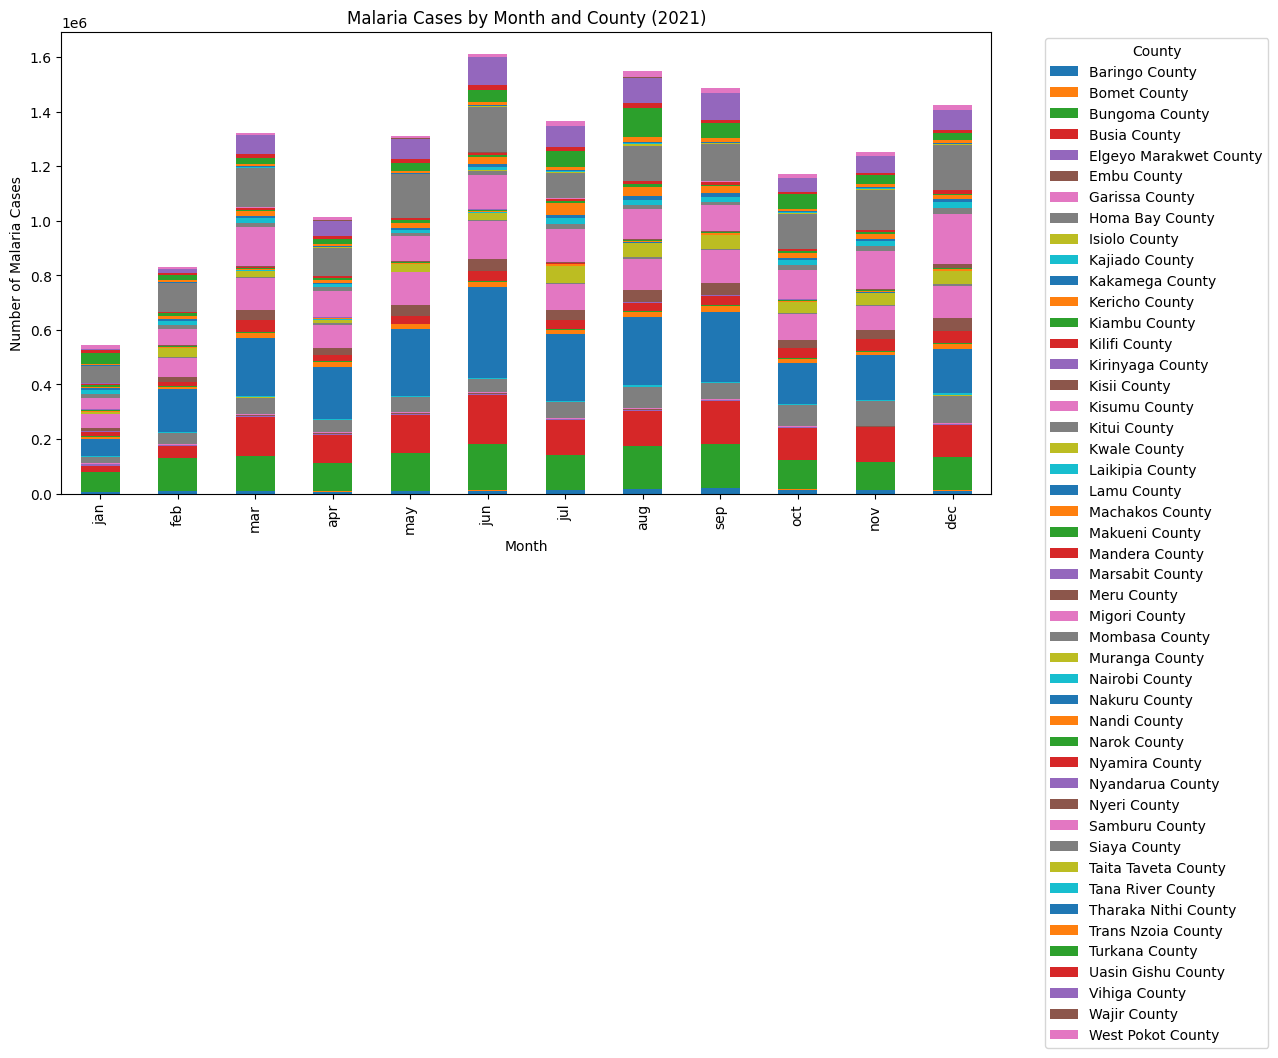

In [3]:

# Group by County and sum up the malaria cases for each month
monthly_data_columns = ['County', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_grouped = df[monthly_data_columns].groupby('County').sum()

# Reset index for easier plotting
df_grouped.reset_index(inplace=True)

# Plotting malaria cases across counties and months
df_grouped.set_index('County').T.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Malaria Cases by Month and County (2021)')
plt.xlabel('Month')
plt.ylabel('Number of Malaria Cases')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 3. Predictive Analysis for Future Malaria Cases

In [4]:

# Prepare data for predictive analysis (monthly case totals as time series data)
monthly_totals = df_grouped.drop('County', axis=1).sum()

# Create X (months as integers) and y (total cases for that month)
X = np.arange(1, 13).reshape(-1, 1)  # Months as numerical values (1-12)
y = monthly_totals.values  # Total cases for each month

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future cases for the next 6 months (months 13 to 18)
future_months = np.arange(13, 19).reshape(-1, 1)
predicted_cases = model.predict(future_months)

# Display predicted values
predicted_cases


array([1680399.03589385, 1733036.09692737, 1785673.15796089,
       1838310.21899441, 1890947.28002793, 1943584.34106145])

The predicted malaria cases for the next six months are as follows:

In [5]:

predicted_cases


array([1680399.03589385, 1733036.09692737, 1785673.15796089,
       1838310.21899441, 1890947.28002793, 1943584.34106145])